In [1]:
import uproot as ut
import matplotlib.pyplot as plt
from uproot3_methods import TLorentzVectorArray
import vector
import awkward as ak

import numpy as np

In [2]:
filename = "../analyzer/NMSSM_XYH_YToHH_6b_MX_700_MY_400_reco_preselections.root:sixBtree"
ttree = ut.open(filename)
ttree.keys()

['HX_b1_recojet_m',
 'HX_b1_recojet_pt',
 'HX_b1_recojet_eta',
 'HX_b1_recojet_phi',
 'HX_b1_recojet_ptRegressed',
 'HX_b2_recojet_m',
 'HX_b2_recojet_pt',
 'HX_b2_recojet_eta',
 'HX_b2_recojet_phi',
 'HX_b2_recojet_ptRegressed',
 'HY1_b1_recojet_m',
 'HY1_b1_recojet_pt',
 'HY1_b1_recojet_eta',
 'HY1_b1_recojet_phi',
 'HY1_b1_recojet_ptRegressed',
 'HY1_b2_recojet_m',
 'HY1_b2_recojet_pt',
 'HY1_b2_recojet_eta',
 'HY1_b2_recojet_phi',
 'HY1_b2_recojet_ptRegressed',
 'HY2_b1_recojet_m',
 'HY2_b1_recojet_pt',
 'HY2_b1_recojet_eta',
 'HY2_b1_recojet_phi',
 'HY2_b1_recojet_ptRegressed',
 'HY2_b2_recojet_m',
 'HY2_b2_recojet_pt',
 'HY2_b2_recojet_eta',
 'HY2_b2_recojet_phi',
 'HY2_b2_recojet_ptRegressed',
 'truH_pt',
 'truH_m',
 'truH_eta',
 'truH_phi',
 'truH_boost_v_mag',
 'truH_boost_v_pt',
 'truH_boost_v_eta',
 'truH_boost_v_phi',
 'nonH_pt',
 'nonH_m',
 'nonH_eta',
 'nonH_phi',
 'nonH_boost_v_mag',
 'nonH_boost_v_pt',
 'nonH_boost_v_eta',
 'nonH_boost_v_phi',
 'truH_bjet_dR',
 'nonH_bj

In [3]:
indexmap = {
    "HX_b1":[0,[0,2,4,6]],
    "HX_b2":[1,[8,10,12,14]],
    "HY1_b1":[2,[1,9,16,18]],
    "HY1_b2":[3,[3,11,20,22]],
    "HY2_b1":[4,[5,13,17,21]],
    "HY2_b2":[5,[7,15,19,23]]
}
varmap = {
    "pt":{"xlabel":"Pt (GeV)","bins":np.linspace(0,300,100)},
    "eta":{"xlabel":"Eta","bins":np.linspace(-2.5,2.5,100)},
    "phi":{"xlabel":"Phi","bins":np.linspace(-3.14,3.14,100)},
    #"m":{"xlabel":"Mass","bins":np.linspace(0,100,100)},
}
def bjet_boost_comparison(ax,bjet,indexlist,variable,title=None,xlabel=None,bins=None):
    tru_index = indexlist[0]
    non_index = indexlist[1]
    
    tag = "" if variable != "pt" else "Regressed"
    
    original = ttree[f"{bjet}_recojet_{variable}{tag}"].array() if variable != "dR" else None
    tru_boost = ttree[f"truH_bjet_boost_{variable}"].array()[:,tru_index]
    
    non_boost_table = ttree[f"nonH_bjet_boost_{variable}"].array()[:,non_index]
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    if original is not None: ax.hist(original,color="black",bins=bins,label="Original")
    for ni in range(4): 
        ax.hist(non_boost_table[:,ni],color="red",histtype="step",bins=bins,label="Non Higgs Boosted" if ni == 0 else None)
    ax.hist(tru_boost,histtype="step",color="green",bins=bins,label="True Higgs Boosted",linewidth=2)
    ax.legend()

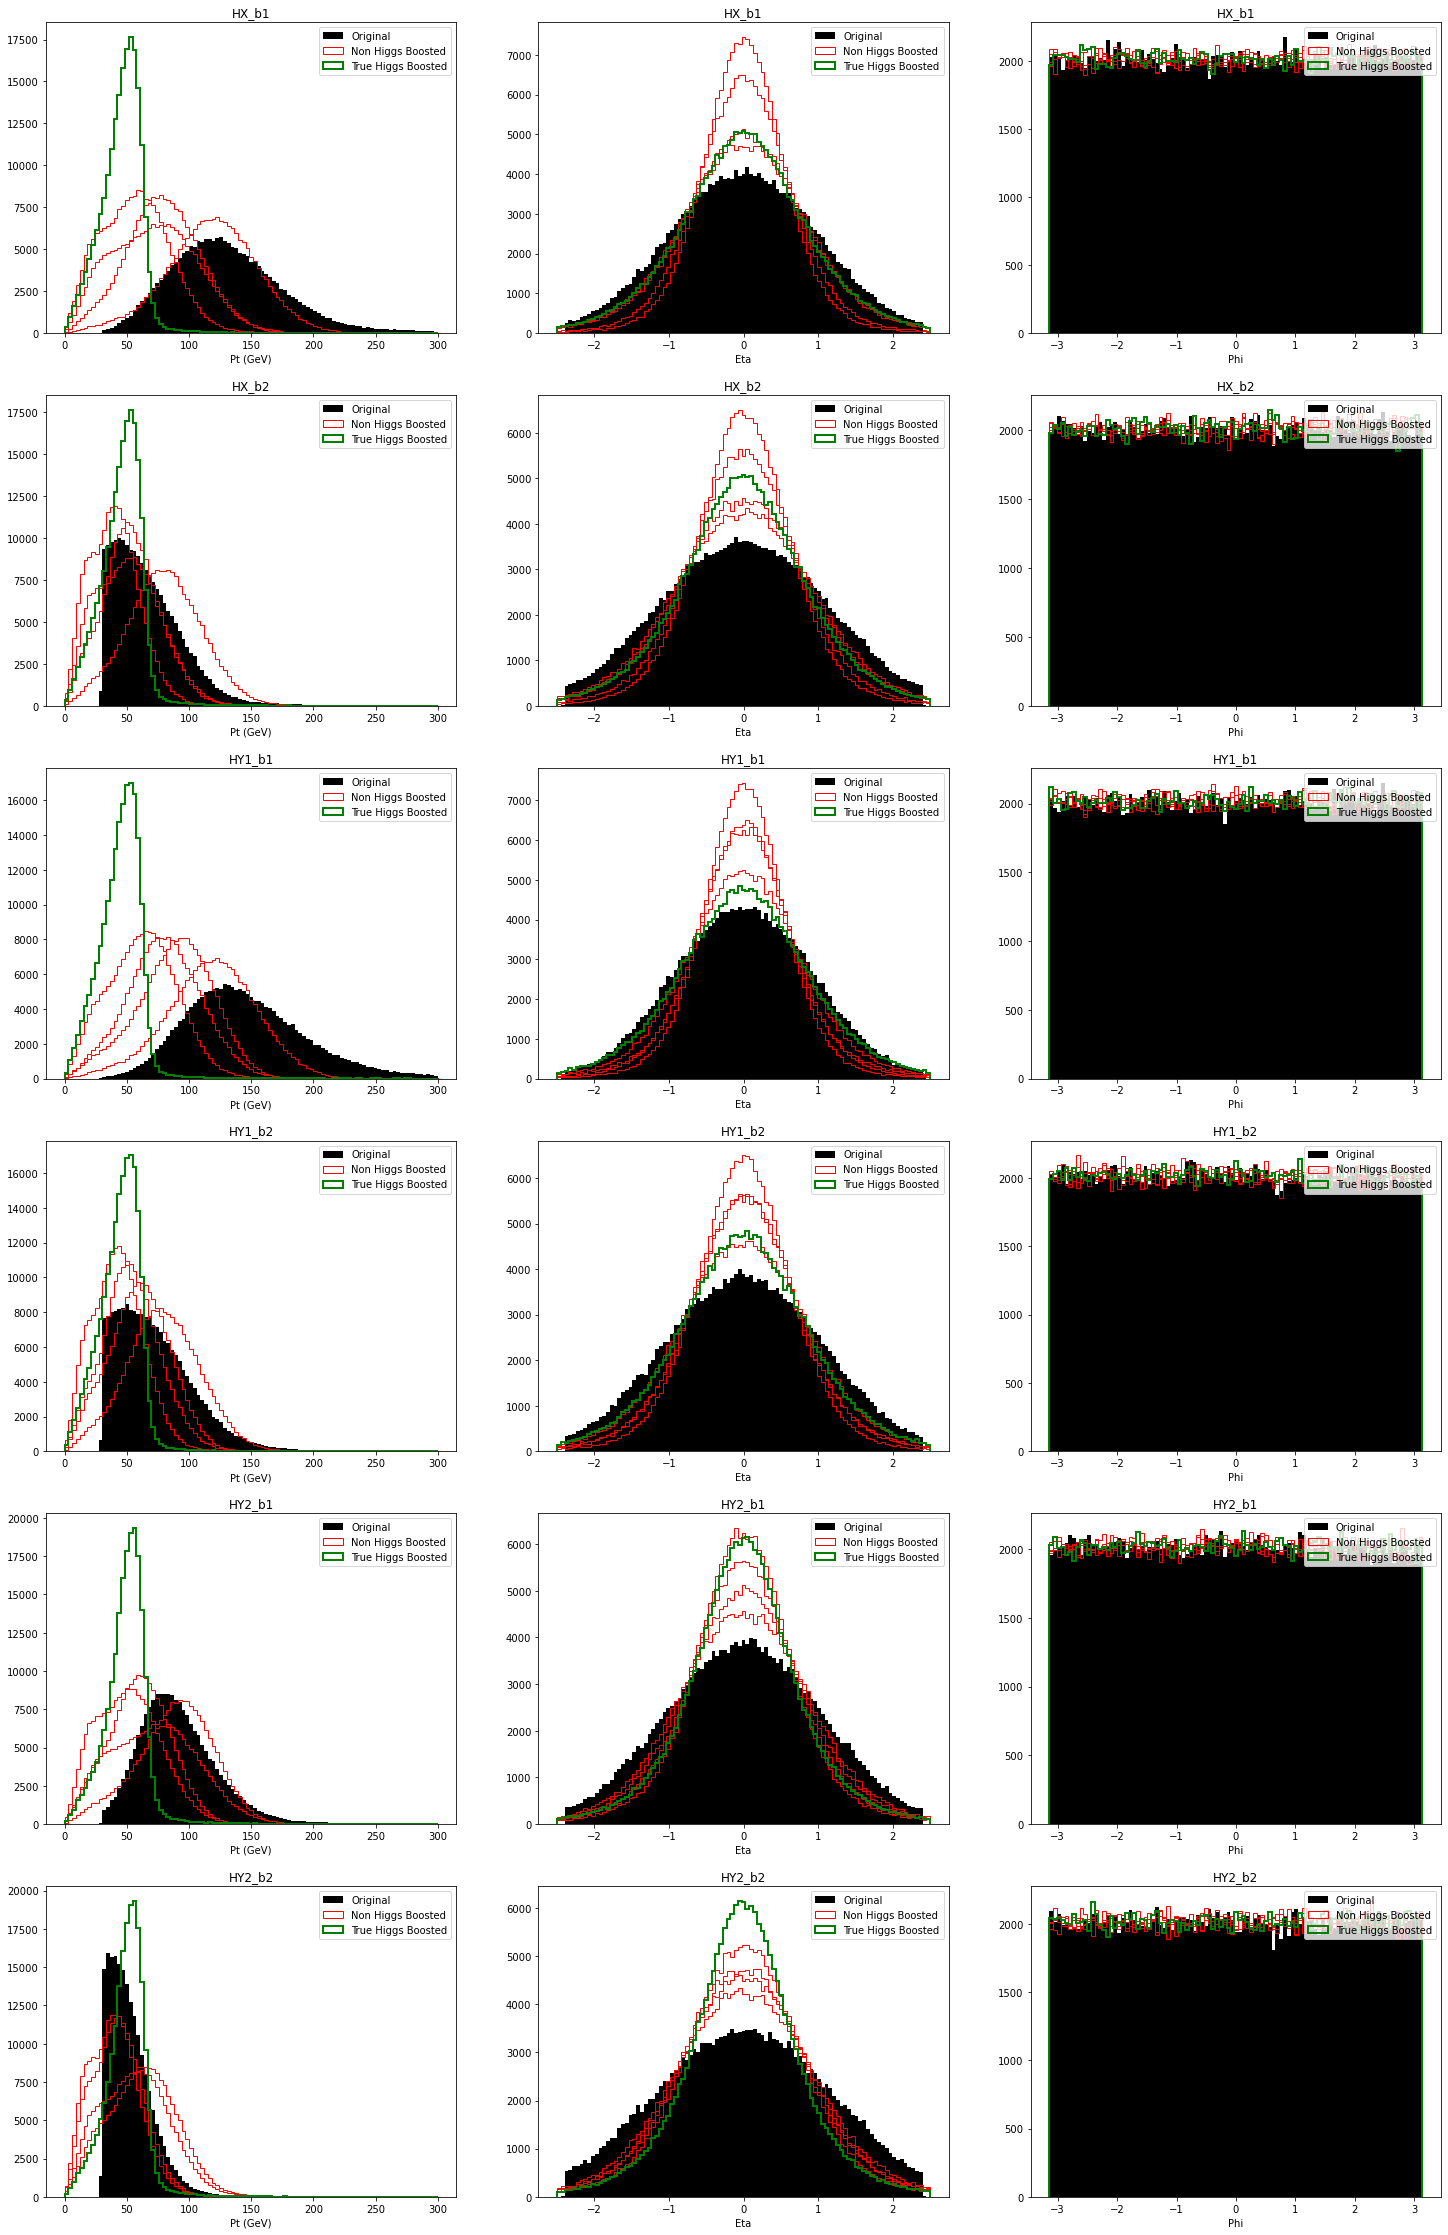

In [4]:
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(25,40))

for i,(bjet,indexlist) in enumerate(indexmap.items()):
    for j,(var,info) in enumerate(varmap.items()):
        bjet_boost_comparison(axs[i][j],bjet,indexlist,var,title=bjet,**info)

In [5]:
def truH_bjet_boost_2D_comparison(fig,ax,bjet,indexlist,variable,title=None,xlabel=None,bins=None):
    tru_index = indexlist[0]
    non_index = indexlist[1]
    
    tag = "" if variable != "pt" else "Regressed"
    original = ttree[f"{bjet}_recojet_{variable}{tag}"].array()
    tru_boost = ttree[f"truH_bjet_boost_{variable}"].array()[:,tru_index]
    
    ax.set_title(title)
    #ax.set_xlabel(f"Original {xlabel}")
    ax.set_ylabel(f"True Higgs Boost {xlabel}")
    n,bx,by,im = ax.hist2d(np.array(original),np.array(tru_boost),bins=(bins,bins))
    fig.colorbar(im, ax=ax)
def nonH_bjet_boost_2D_comparison(fig,ax,bjet,indexlist,variable,title=None,xlabel=None,bins=None):
    tru_index = indexlist[0]
    non_index = indexlist[1]
    
    tag = "" if variable != "pt" else "Regressed"
    original = ttree[f"{bjet}_recojet_{variable}{tag}"].array()
    
   # ax.set_title(title)
    ax.set_xlabel(f"Original {xlabel}")
    ax.set_ylabel(f"Non Higgs Boost {xlabel}")
    non_boost_table = ttree[f"nonH_bjet_boost_{variable}"].array()[:,non_index]
    non_boost_mean = ak.mean(non_boost_table,axis=-1)
    
    n,bx,by,im = ax.hist2d(np.array(original),np.array(non_boost_mean),bins=(bins,bins))
    fig.colorbar(im, ax=ax)

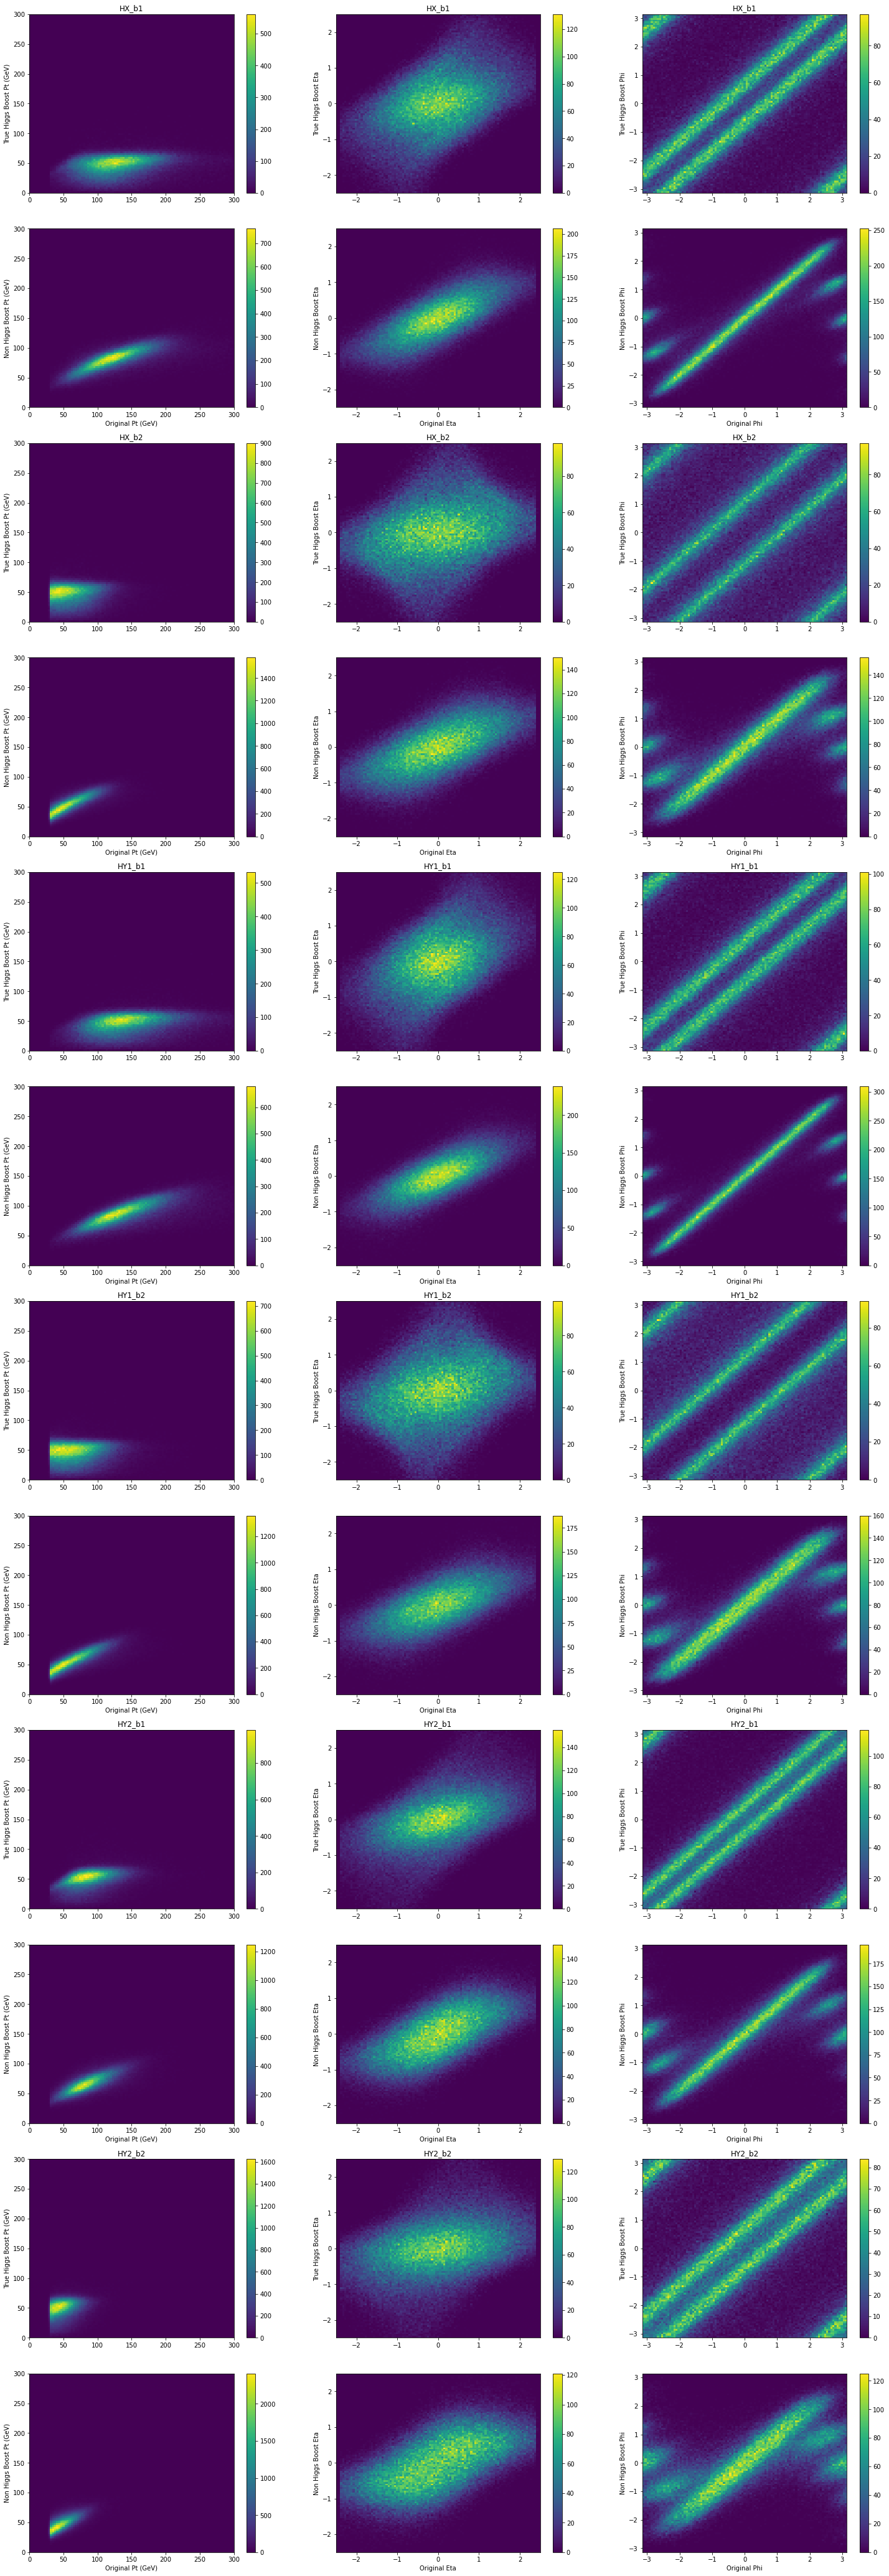

In [6]:
fig, axs = plt.subplots(nrows=12, ncols=3, figsize=(25,75))
for i,(bjet,indexlist) in enumerate(indexmap.items()):
    for j,(var,info) in enumerate(varmap.items()):
        truH_bjet_boost_2D_comparison(fig,axs[2*i][j],bjet,indexlist,var,title=bjet,**info)
        nonH_bjet_boost_2D_comparison(fig,axs[2*i+1][j],bjet,indexlist,var,title=bjet,**info)

In [7]:
dijet_indexmap = {
    "HX_b1":[0,[0,1,2,3]],
    "HX_b2":[0,[4,5,6,7]],
    "HY1_b1":[1,[0,4,8,9]],
    "HY1_b2":[1,[1,5,10,11]],
    "HY2_b1":[2,[2,6,8,10]],
    "HY2_b2":[2,[3,7,9,11]]
}
def dijet_comparison(ax,bjet,indexlist,variable,title=None,xlabel=None,bins=None):
    tru_index = indexlist[0]
    non_index = indexlist[1]
    
    tag = "" if variable != "pt" else "Regressed"
    original = ttree[f"{bjet}_recojet_{variable}{tag}"].array() if "dR" not in variable else None
    
    truH = ttree[f"truH_{variable}"].array()[:,tru_index]
    
    nonH_table = ttree[f"nonH_{variable}"].array()[:,non_index]
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    if original is not None: ax.hist(original,color="black",bins=bins,label="Original BJet")
    for ni in range(4): 
        ax.hist(nonH_table[:,ni],color="red",histtype="step",bins=bins,label="Non Higgs Di-Jet" if ni == 0 else None)
    ax.hist(truH,histtype="step",color="green",bins=bins,label="True Higgs Di-Jet",linewidth=2)
    ax.legend()

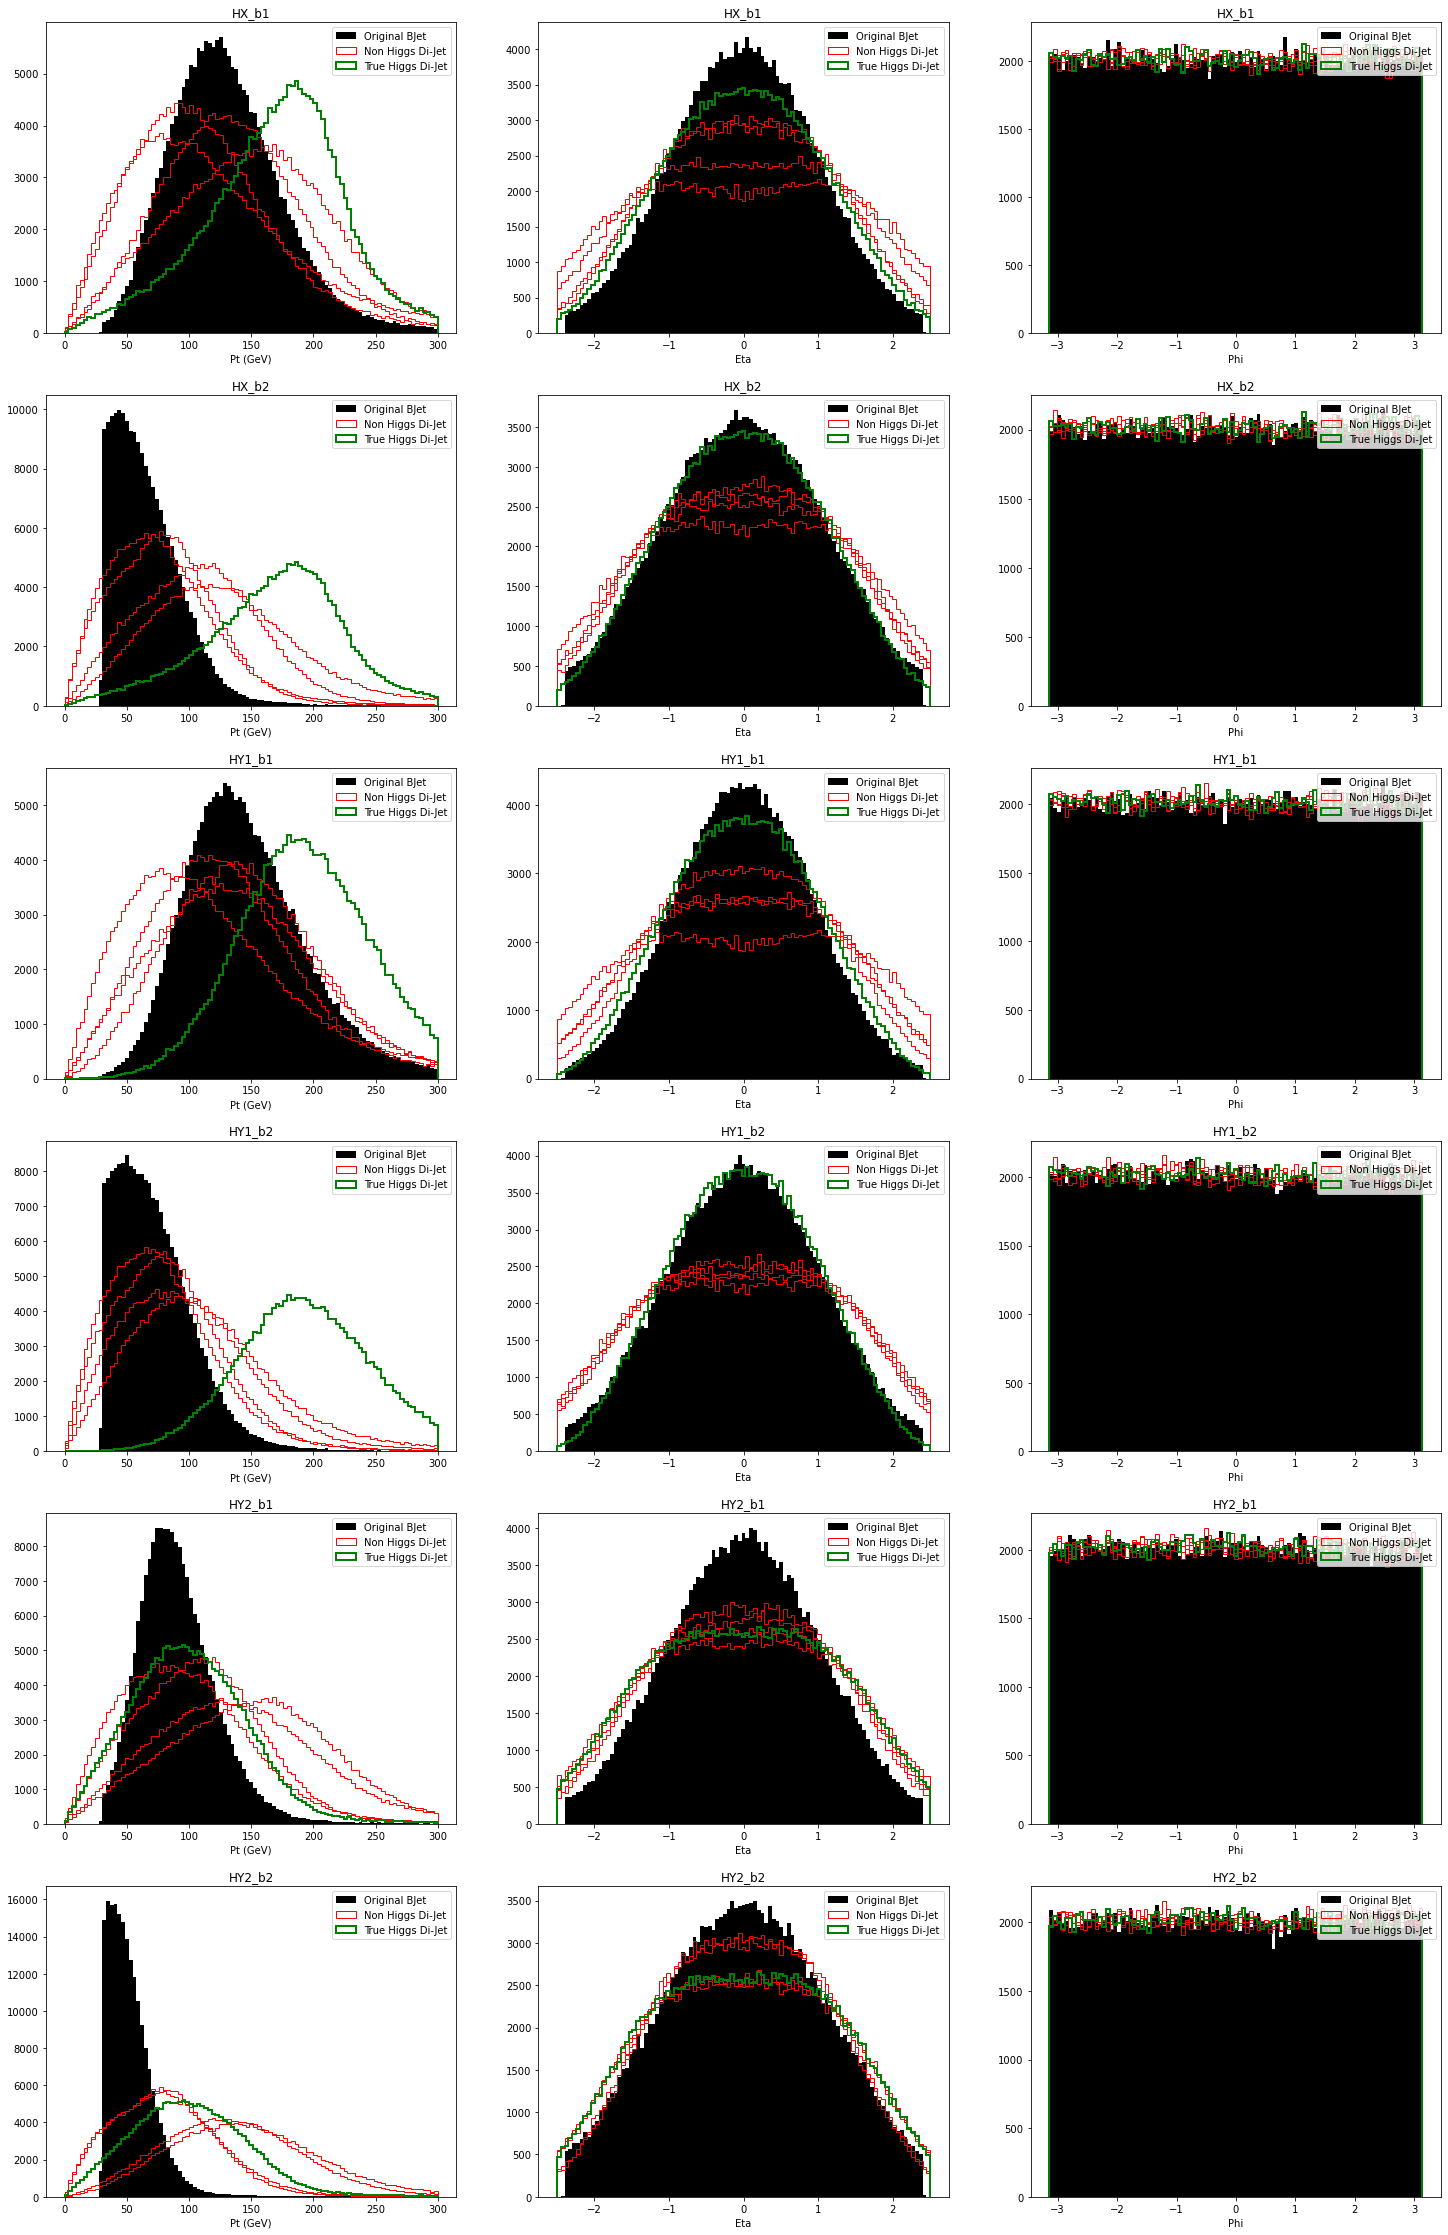

In [8]:
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(25,40))

for i,(bjet,indexlist) in enumerate(dijet_indexmap.items()):
    for j,(var,info) in enumerate(varmap.items()):
        dijet_comparison(axs[i][j],bjet,indexlist,var,title=bjet,**info)

In [9]:
def truH_dijet_2D_comparison(fig,ax,bjet,indexlist,variable,title=None,xlabel=None,bins=None):
    tru_index = indexlist[0]
    non_index = indexlist[1]
    
    tag = "" if variable != "pt" else "Regressed"
    original = ttree[f"{bjet}_recojet_{variable}{tag}"].array()
    
    truH = ttree[f"truH_{variable}"].array()[:,tru_index]
    
    ax.set_title(title)
    #ax.set_xlabel(f"Original {xlabel}")
    ax.set_ylabel(f"True Higg DiJet {xlabel}")
    n,bx,by,im = ax.hist2d(np.array(original),np.array(truH),bins=(bins,bins))
    fig.colorbar(im, ax=ax)
def nonH_dijet_2D_comparison(fig,ax,bjet,indexlist,variable,title=None,xlabel=None,bins=None):
    tru_index = indexlist[0]
    non_index = indexlist[1]
    
    tag = "" if variable != "pt" else "Regressed"
    original = ttree[f"{bjet}_recojet_{variable}{tag}"].array()
    
    nonH_table = ttree[f"nonH_{variable}"].array()[:,non_index]
    nonH_mean = ak.mean(nonH_table,axis=-1)
    
   # ax.set_title(title)
    ax.set_xlabel(f"Original BJet {xlabel}")
    ax.set_ylabel(f"Non Higgs DiJet {xlabel}")
    
    n,bx,by,im = ax.hist2d(np.array(original),np.array(nonH_mean),bins=(bins,bins))
    fig.colorbar(im, ax=ax)

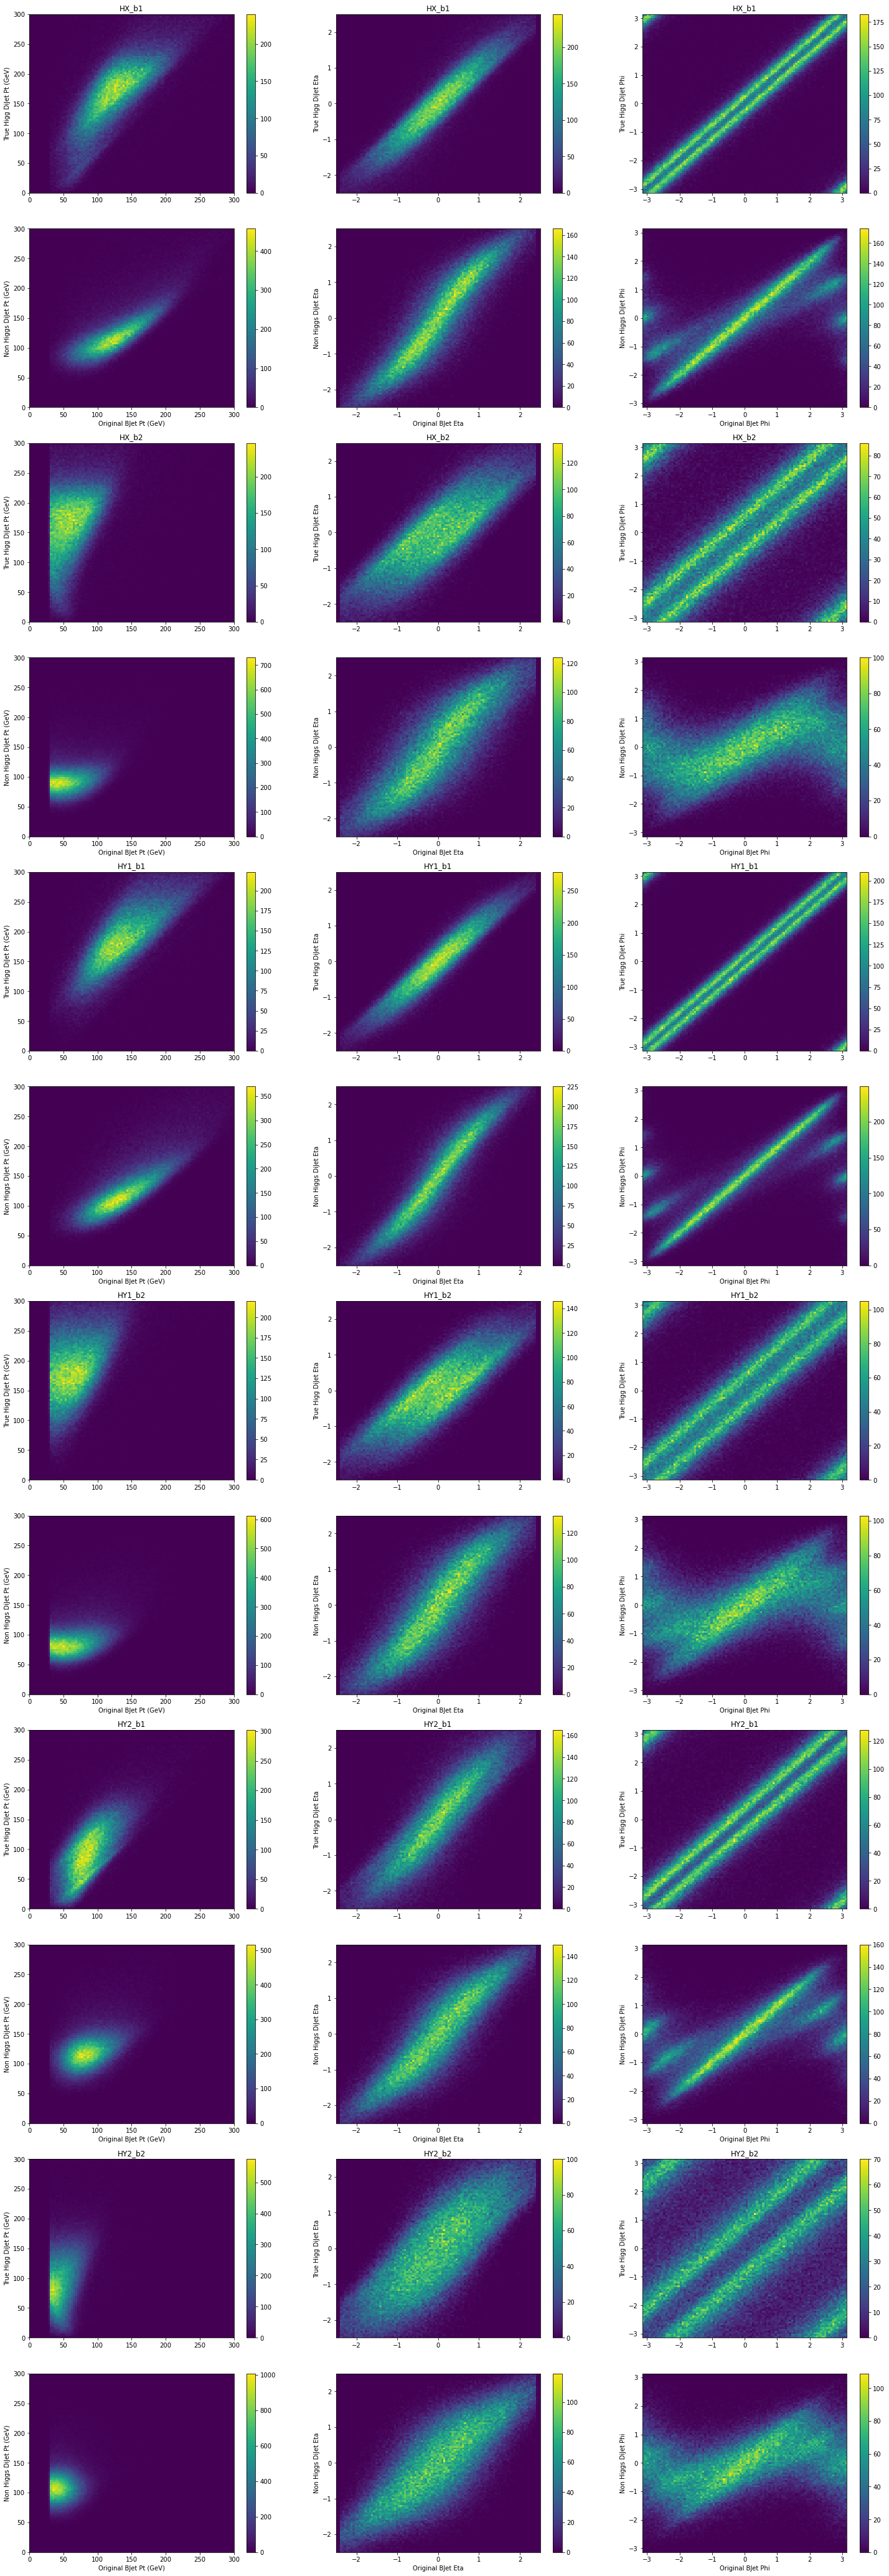

In [10]:
fig, axs = plt.subplots(nrows=12, ncols=3, figsize=(25,75))

for i,(bjet,indexlist) in enumerate(dijet_indexmap.items()):
    for j,(var,info) in enumerate(varmap.items()):
        truH_dijet_2D_comparison(fig,axs[2*i][j],bjet,indexlist,var,title=bjet,**info)
        nonH_dijet_2D_comparison(fig,axs[2*i+1][j],bjet,indexlist,var,title=bjet,**info)

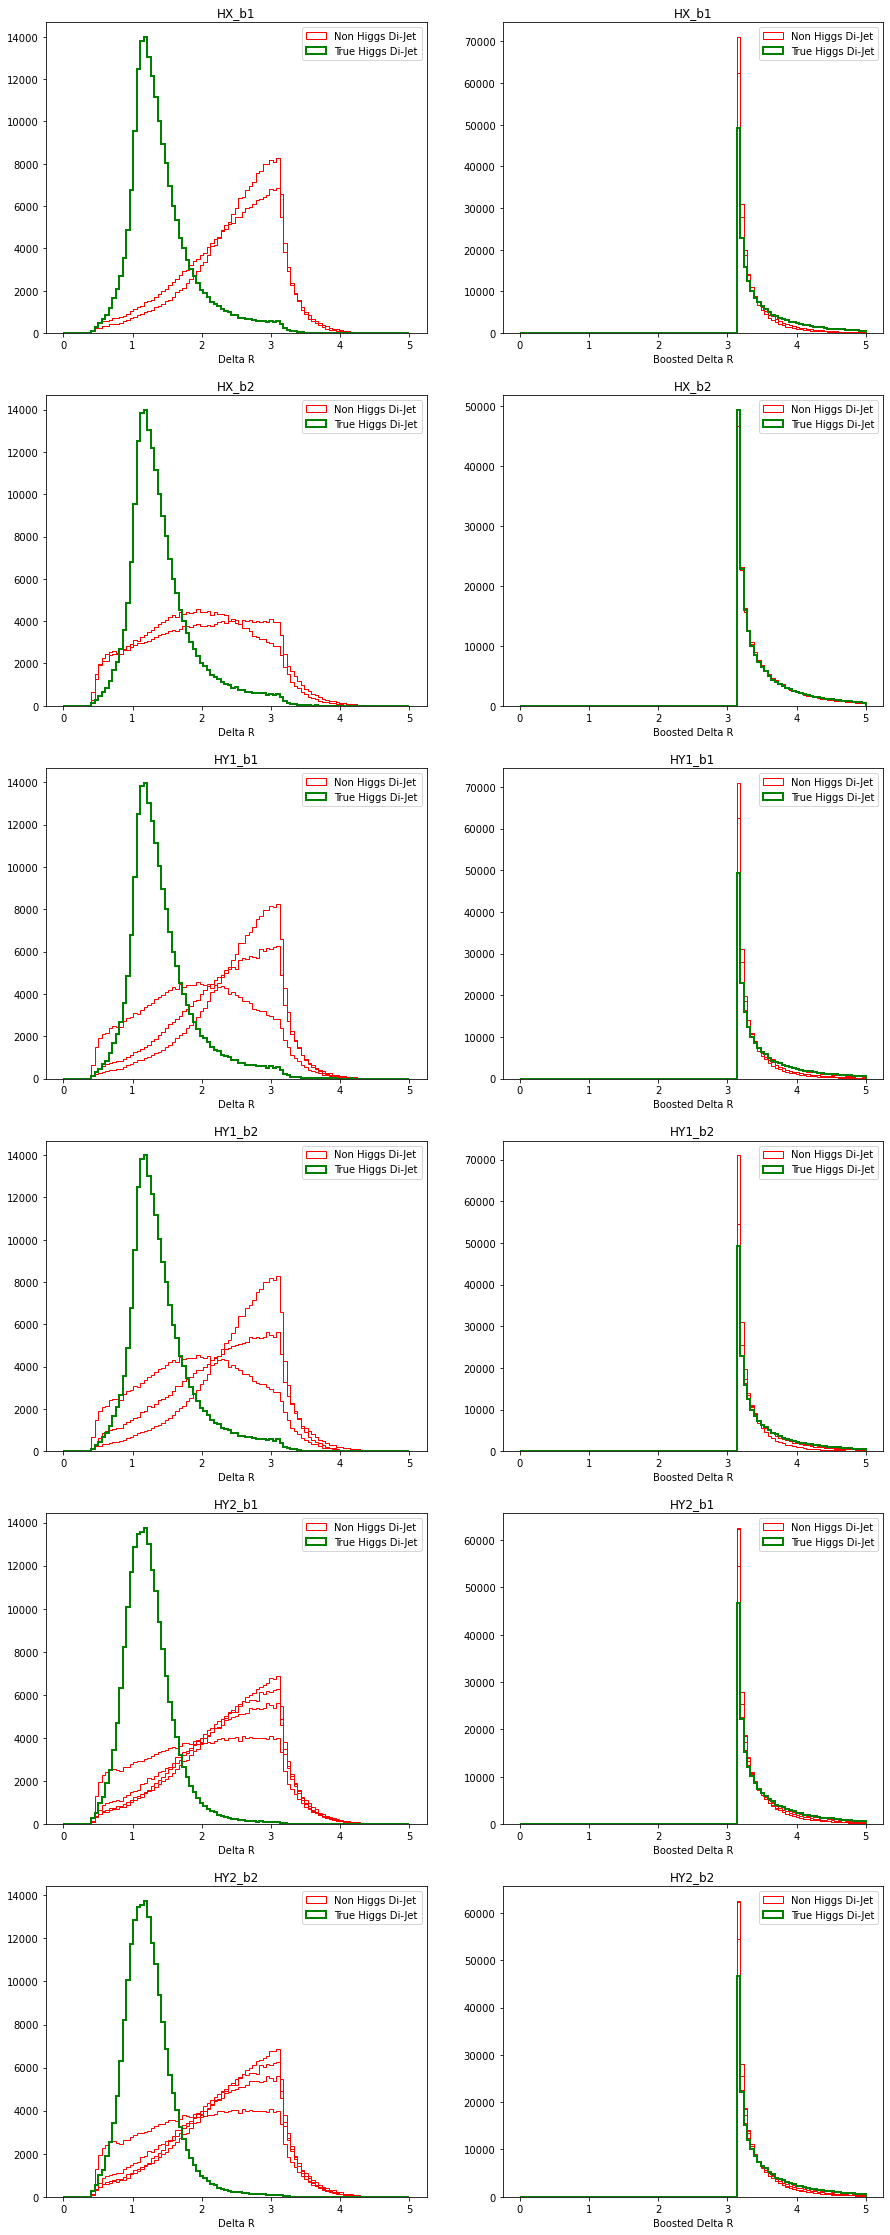

In [11]:
dRvar = {"dR":{"xlabel":"Delta R","bins":np.linspace(0,5,100)}}
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(15,40))

for i,(bjet,indexlist) in enumerate(dijet_indexmap.items()):
    for var,info in dRvar.items():
        info["xlabel"] = "Delta R"
        dijet_comparison(axs[i][0],bjet,indexlist,f"bjet_{var}",title=bjet,**info)
        info["xlabel"] = "Boosted Delta R"
        dijet_comparison(axs[i][1],bjet,indexlist,f"bjet_boost_{var}",title=bjet,**info)